In [1]:
from Mask_RCNN_Detect import Mask_RCNN_Detect

Using TensorFlow backend.
C:\Users\jatin\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
weights = 'weights/epoch55.h5'
mrcnn = Mask_RCNN_Detect(weights)

W0725 02:35:30.883210 51212 deprecation_wrapper.py:119] From C:\Users\jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0725 02:35:30.902163 51212 deprecation_wrapper.py:119] From C:\Users\jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0725 02:35:30.906150 51212 deprecation_wrapper.py:119] From C:\Users\jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0725 02:35:30.932081 51212 deprecation_wrapper.py:119] From C:\Users\jatin\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0725 02:35:30.935074 51212 deprecation_wrapper.py:119]

Loading weights from  weights/epoch55.h5
initial detect works


In [3]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [4]:
files = os.listdir('imgcache/18/62239/'); files

['94165.png', '94166.png', '94167.png', '94168.png', '94169.png', '94170.png']

# Plotting Combined Masks

In [ ]:
init = np.zeros([256*2, 256*3, 3])

In [ ]:
for i in range(6):
    im = plt.imread('imgcache/18/62239/' + files[i])
    if i <= 2:
        init[0:256, i*256:(i+1)*256, :] = im
    else:
        i -= 3
        init[256:256*2, i*256:(i+1)*256, :] = im

In [ ]:
init.shape

In [ ]:
plt.imshow(init)

In [ ]:
init = (init * 256).astype(np.uint8)

In [ ]:
masks = mrcnn._detect_with_split(init); masks

In [ ]:
plt.imshow(masks)

In [ ]:
plt.imshow(masks) # 5

In [ ]:
plt.imshow(masks) # 15

In [ ]:
plt.imshow(masks) # 30

In [ ]:
plt.imshow(masks) # 55

# Extracting only smaller masks

In [ ]:
def plot_mask(masks, labels):
    if masks is None: # just an empty plot
        plt.imshow(np.zeros([512,512,3]).astype(np.uint8))
        return
    net_image = np.zeros([masks.shape[0],masks.shape[1],3])
    assert masks.shape[-1] == len(labels)
    for i in range(masks.shape[2]):
        m = masks[:,:,i].astype(np.uint8)[:,:,None]
        mask = np.stack([m,m,m], axis=2).reshape((m.shape[0], m.shape[1], 3))
        if labels[i] == 'building':
            mask = mask * np.array([25,160,90]) # yellow for corn
        net_image += mask
    plt.imshow(net_image.astype(np.uint8))

In [ ]:
im = (plt.imread('imgcache/18/62239/94167.png') * 256).astype(np.uint8)
plt.imshow(im)

In [ ]:
im = Image.fromarray(im)
im = im.resize((320,320), Image.ANTIALIAS)
out = mrcnn.model.detect([imageio.core.util.Array(np.array(im)[:,:,:3])])

In [ ]:
def small_merge(masks): # merges only the small ones inside
    net_mask = np.zeros((masks.shape[0],masks.shape[1]))
    for i,layer in enumerate(range(masks.shape[2])):
        m = masks[:,:,layer] # gives an id
        shared = (m & (net_mask != 0))
        i += 1
        shared_count = np.count_nonzero(shared)
        if (shared_count > 100):
            new_id = i
            tmp = np.argwhere(shared)[0]
            collision_id = net_mask[tmp[0], tmp[1]]
            collision_id_mask = net_mask == collision_id
a
            new_count = np.count_nonzero(m)
            collision_count = np.count_nonzero(collision_id_mask)

#             if new_count > collision_count and new_count < 10000:
#                 net_mask[collision_id_mask] = 0
#                 net_mask += m * i
            if new_count < collision_count:
                net_mask[collision_id_mask] = 0
                net_mask += m * i
        else:
            net_mask += m * i
    plt.imshow(net_mask.astype(np.uint8))
    return net_mask

In [ ]:
plot_mask(out[0]['masks'], ['building' for _ in range(out[0]['masks'].shape[-1])]) # it works!!a

In [ ]:
res = small_merge(out[0]['masks'])

In [ ]:
plt.imshow(res != 0)

### Result

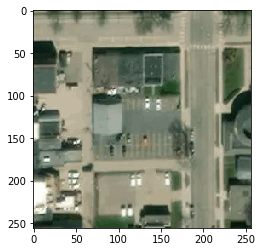

In [5]:
im = (plt.imread('imgcache/18/62239/94167.png') * 256).astype(np.uint8)
plt.imshow(im)

In [6]:
res = mrcnn.detect_building(im)

<class 'numpy.ndarray'> (256, 256, 3)


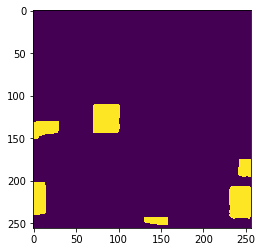

In [8]:
plt.imshow(res)